In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

### Example 1 - Scatterplot with negative correlation using `matplotlib`

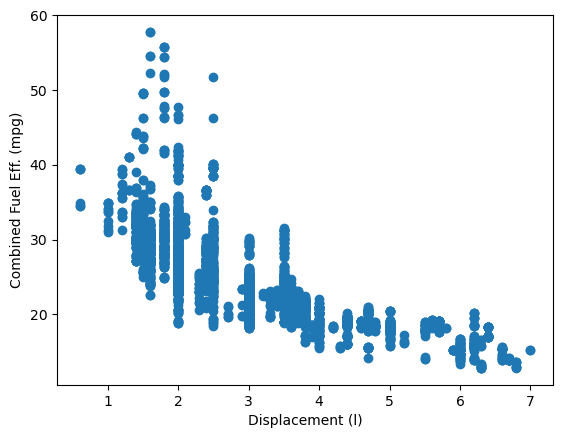

In [5]:
plt.scatter(data=df, x='displ', y='comb') # displ: engine displacement in liters, comb: combined fuel efficiency in miles per gallon
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 2 - Scatterplot with negative correlation using `seaborn`

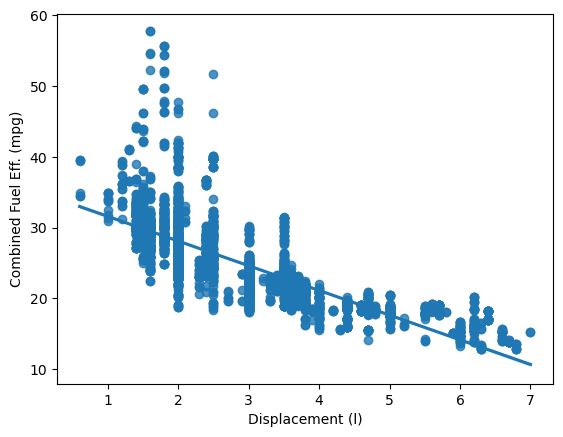

In [6]:
sns.regplot(data=df, x='displ', y='comb') # regression line
# sns.regplot(data=df, x='displ', y='comb', fit_reg=False) # no regression line
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 3 - Plot the regression line on transformed data

In the above plot, the trend looks like a $log(y)\propto x$ relationship. That is, linear increases in $x$ are associated with linear increases in $log(y)$. Plotting the regression line on $log(y)$ is more appropriate than the raw units.

In [7]:
def log_transform(x, inverse=False):
    """applies a log transformation."""
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

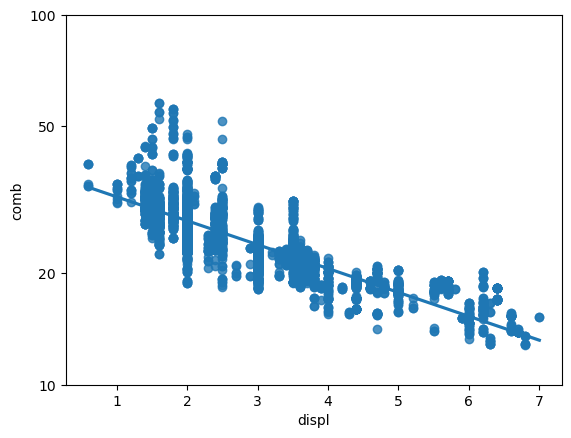

In [8]:
sns.regplot(x=df['displ'], y=df['comb'].apply(log_transform))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_transform(tick_locs), tick_locs);

### Example 4 - Other visualizations

Create a scatterplot of city vs. highway fuel mileage.

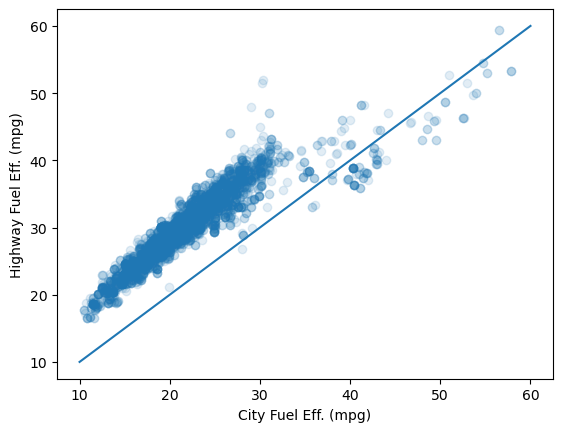

In [9]:
plt.scatter(data=df, x='city', y='highway', alpha=1/8)
plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60) showing where city and highway mpg values are equal
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend. 

### Example 5 - Scatter plot with rug plot

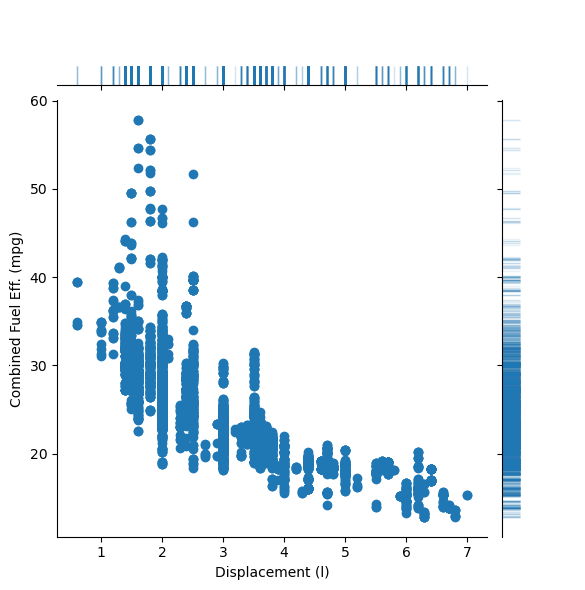

In [10]:
g = sns.JointGrid(data=df, x='displ', y='comb')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height=0.25, alpha=0.1)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

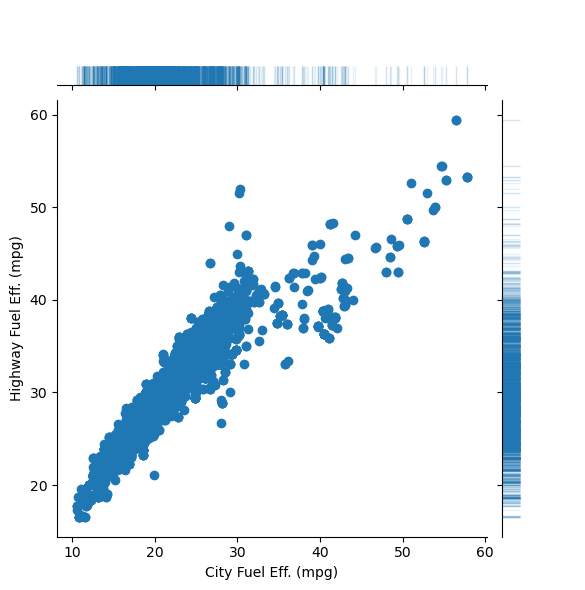

In [11]:
g = sns.JointGrid(data=df, x='city', y='highway')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height=0.25, alpha=0.1)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

### Example 6 - Plot matrix with scatter plots

In [12]:
df = pd.read_csv('../../../data/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


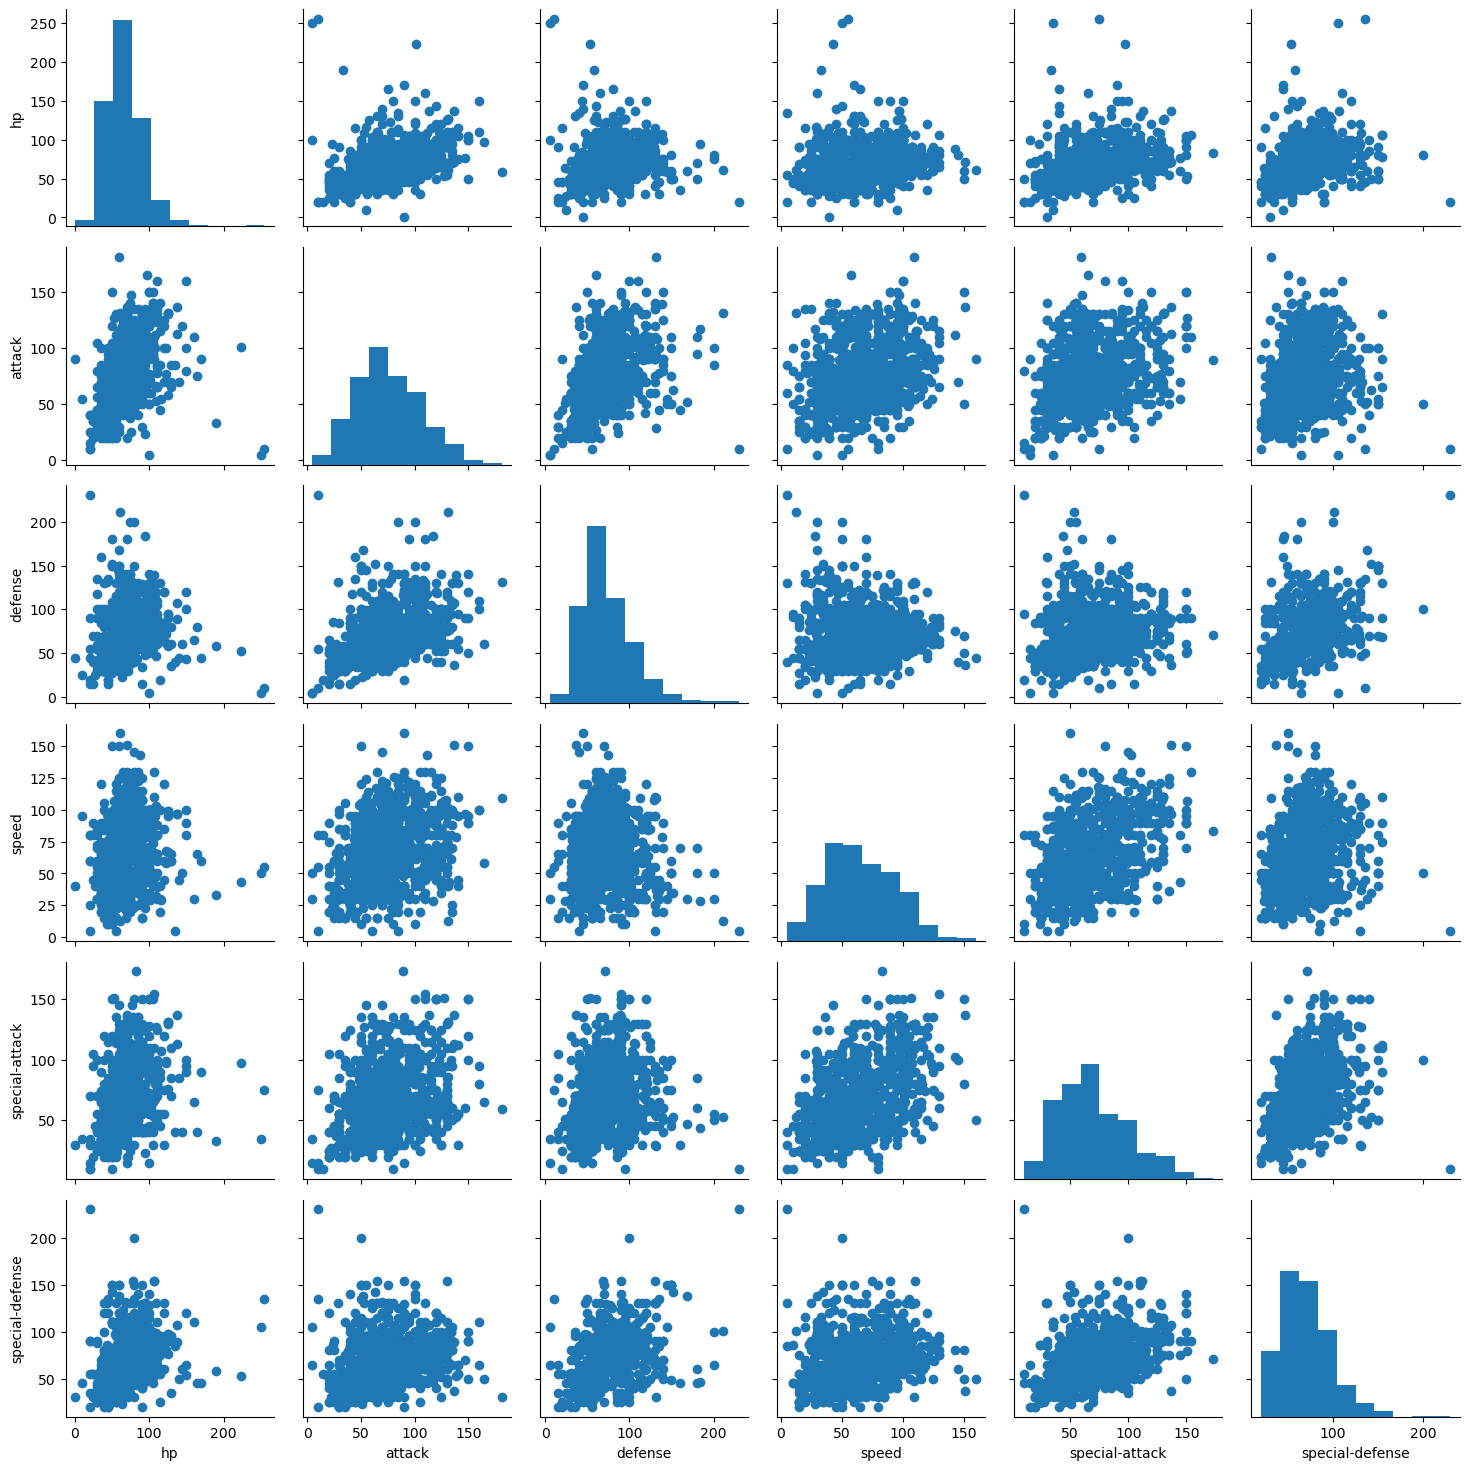

In [13]:
pokemon_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sns.PairGrid(df, vars=pokemon_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);